<a href="https://colab.research.google.com/github/KingJulien0709/RowingAnalytics/blob/main/rowing_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install ultralytics
from google.colab import drive
drive.mount('/content/drive')
from ultralytics import YOLO

model = YOLO("yolo11n-pose.pt")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 911.4/911.4 kB 11.4 MB/s eta 0:00:00
Mounted at /content/drive
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.97M/5.97M [00:00<00:00, 70.8MB/s]


In [2]:
import os
import cv2

video_path= "/content/drive/My Drive/ergo_ok_aufriss.mp4" # "

FRAME_RATE = 0
FRAME_COUNT = 0

cap  = cv2.VideoCapture(video_path)

if not cap.isOpened():
  print("Error opening video file")
else:
  FRAME_RATE = round(cap.get(cv2.CAP_PROP_FPS))
  FRAME_COUNT = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

cap.release()



In [3]:
#video_path = "/content/drive/My Drive/ergo_short2_small.mp4"
#"/content/drive/My Drive/video_row2.mp4"
result = model.track(video_path, save=True, conf =0.8,name ="run")

requirements: Ultralytics requirement ['lap>=0.5.12'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.6 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 9.5s, installed 1 package: ['lap>=0.5.12']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/384) /content/drive/My Drive/ergo_ok_aufriss.mp4: 384x640 1 person, 904.6ms
video 1/1 (frame 2/384) /content/driv

In [4]:
#print(result[0].cpu)


In [5]:
def interpolate_wrong_numbers(keyframes):
  error_values = torch.any(keyframes[:, :,0:2]==0, dim=(1,2))
  #selected_joints_keyframes[error_values] = torch.
  keyframe_nparray = keyframes.numpy()
  #for i in range(keyframe_nparray.shape[0]):
   # for j in range(keyframe_nparray.shape[1]):


384
torch.Size([384, 6, 2])
torch.Size([384, 6, 2])
tensor([0.3760, 0.3743, 0.3765, 0.3748, 0.3725, 0.3711, 0.3708, 0.3716, 0.3715, 0.3702, 0.3706, 0.3697, 0.3661, 0.3658, 0.3645, 0.3627, 0.3624, 0.3590, 0.3571, 0.3537, 0.3535, 0.3494, 0.3414, 0.3371, 0.3277, 0.3281, 0.3221, 0.3169, 0.3075, 0.3027, 0.3004, 0.2939, 0.2944, 0.3012, 0.2924, 0.2929, 0.3049, 0.3079, 0.3112,
        0.3110, 0.3032, 0.3073, 0.3077, 0.3173, 0.3155, 0.3102, 0.3105, 0.3140, 0.3176, 0.3201, 0.3255, 0.3294, 0.3279, 0.3272, 0.3336, 0.3316, 0.3309, 0.3321, 0.3462, 0.3512, 0.3519, 0.3512, 0.3567, 0.3579, 0.3804, 0.3850, 0.3936, 0.3921, 0.4099, 0.4191, 0.4342, 0.4554, 0.4562, 0.4614, 0.4615, 0.4691, 0.4766, 0.4776,
        0.4800, 0.4752, 0.4750, 0.4747, 0.4737, 0.4690, 0.4743, 0.4686, 0.4562, 0.4556, 0.4549, 0.4500, 0.4422, 0.4285, 0.4257, 0.4152, 0.4149, 0.4347, 0.4130, 0.4046, 0.3957, 0.3796, 0.3762, 0.3761, 0.3633, 0.3656, 0.3628, 0.3571, 0.3652, 0.3468, 0.3469, 0.3401, 0.3423, 0.3338, 0.3281, 0.3433, 0.3379, 0.33

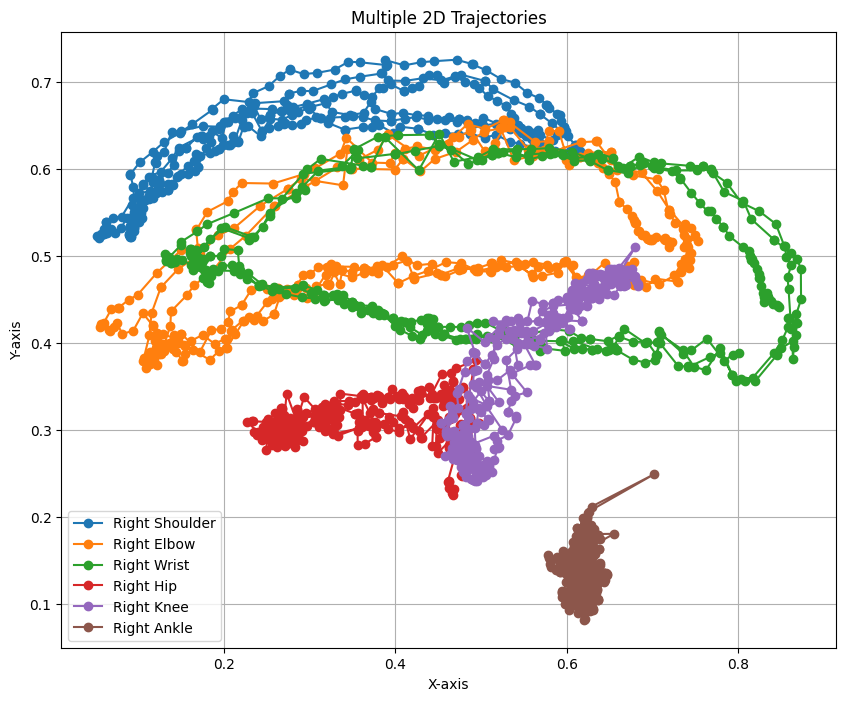

In [6]:
import torch
import matplotlib.pyplot as plt

body_parts = {
    0: "Nose",
    1: "Left Eye",
    2: "Right Eye",
    3: "Left Ear",
    4: "Right Ear",
    5: "Left Shoulder",
    6: "Right Shoulder",
    7: "Left Elbow",
    8: "Right Elbow",
    9: "Left Wrist",
    10: "Right Wrist",
    11: "Left Hip",
    12: "Right Hip",
    13: "Left Knee",
    14: "Right Knee",
    15: "Left Ankle",
    16: "Right Ankle"
}
print(len(result))
result_copy = []



normalized_keyframes_tensor = [result[0].keypoints.xyn for result in result]
selcted_joints = [6, 8, 10, 12, 14, 16]

#print(normalized_keyframes_tensor[:][0].shape)

#keyframe = normalized_keyframes_tensor[0]#.squeeze(0)
#print(keyframe.shape)
#selected_joints_keyframe = keyframe[selcted_joints]




selected_joints_keyframes = torch.stack([n_k_t.squeeze(0)[selcted_joints] for n_k_t in normalized_keyframes_tensor])
error_values = torch.any(selected_joints_keyframes[:, :,0:2]==0, dim=(1,2))
filtered_keyframes = selected_joints_keyframes[~error_values]
#selected_joints_keyframes[error_values] =
print(filtered_keyframes.shape)

print(selected_joints_keyframes.shape)


#plot the trajectories
print(filtered_keyframes[:,0,1])
trajectories = { body_parts[selcted_joints[i]]: (filtered_keyframes[:,i,0], filtered_keyframes[:,i,1]) for i in range(len(selcted_joints))}

#trajectories = {
#    "joint_0": (filtered_keyframes[:,0,0], filtered_keyframes[:,0,1]),
#    "joint_1": (filtered_keyframes[:,1,0], filtered_keyframes[:,1,1]),
#    "joint_2": (filtered_keyframes[:,2,0], filtered_keyframes[:,2,1]),
 #   "joint_8": (filtered_keyframes[:,3,0], filtered_keyframes[:,3,1]),
#}


plt.figure(figsize=(10, 8))
for label, (x, y) in trajectories.items():
    plt.plot(x.cpu(), 1-y.cpu(), marker='o', label=label)

# Customizing the plot
plt.title("Multiple 2D Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.legend()  # Add legend to distinguish paths
plt.show()

In [7]:
def calculate_angles_for_joint(keyframes, angle_pairs):
  v1_single_v = keyframes[:, angle_pairs[0, 0]] - keyframes[:, angle_pairs[0, 1]]
  v2_single_v = keyframes[:, angle_pairs[1, 0]] - keyframes[:, angle_pairs[1, 1]]
  angles = torch.acos(torch.sum(v1_single_v * v2_single_v, dim=1) / (torch.norm(v1_single_v, dim=1) * torch.norm(v2_single_v, dim=1)))*180/3.14
  return angles

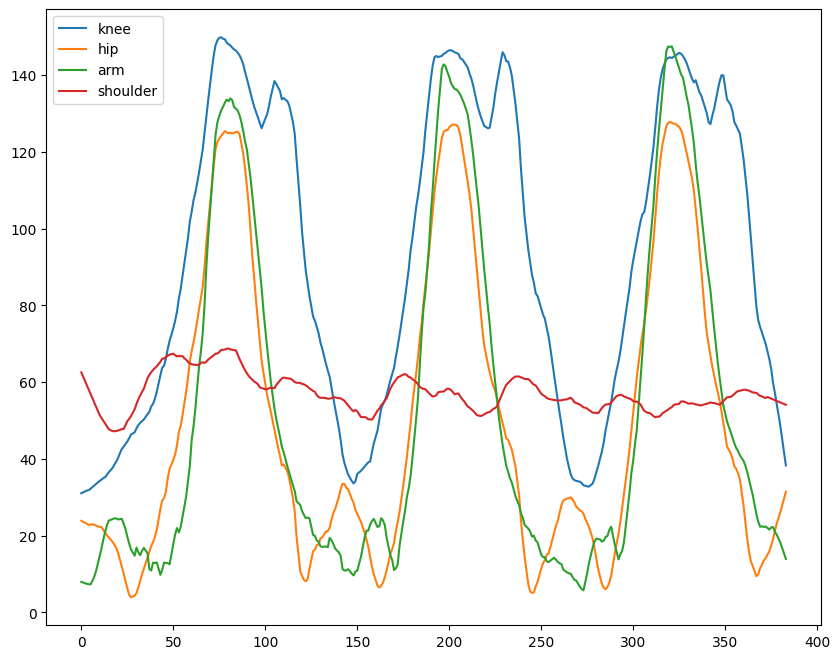

In [24]:
#calculate distances between keypoints
from scipy.signal import savgol_filter


selected_angle_pairs = torch.tensor([
    [[4, 5],[4, 3]], #knee angle
    [[3,2],[3,4]], #hip angle
    [[1,2],[1,0]], #arm angle
    [[2,1],[2,3]], #shoulder angle
])



timestep = 31
anglepair = 0
#v1_single_v = filtered_keyframes[:, selected_angle_pairs[anglepair, 0, 0]] - filtered_keyframes[:, selected_angle_pairs[anglepair, 0, 1]]
#v2_single_v = filtered_keyframes[:, selected_angle_pairs[anglepair, 1, 0]] - filtered_keyframes[:, selected_angle_pairs[anglepair, 1, 1]]
#angles = torch.acos(torch.sum(v1_single_v * v2_single_v, dim=1) / (torch.norm(v1_single_v, dim=1) * torch.norm(v2_single_v, dim=1)))*180/3.14
#angles =

angles_knee = calculate_angles_for_joint(filtered_keyframes, selected_angle_pairs[0])
angles_hip = calculate_angles_for_joint(filtered_keyframes, selected_angle_pairs[1])
angles_arm = calculate_angles_for_joint(filtered_keyframes, selected_angle_pairs[2])
angles_shoulder = calculate_angles_for_joint(filtered_keyframes, selected_angle_pairs[3])

window_length = FRAME_RATE // 5 #for consistent smoothing adjust the windowlenght to the framerate
smoothed_angles_knee = savgol_filter(angles_knee.cpu().numpy(), window_length=window_length, polyorder=1)
smoothed_angles_hip = savgol_filter(angles_hip.cpu().numpy(), window_length=window_length, polyorder=1)
smoothed_angles_arm = savgol_filter(angles_arm.cpu().numpy(), window_length=window_length, polyorder=1)
smoothed_angles_shoulder = savgol_filter(angles_shoulder.cpu().numpy(), window_length=window_length*3, polyorder=1)

plt.figure(figsize=(10, 8))
plt.plot(smoothed_angles_knee)
plt.plot(smoothed_angles_hip)
plt.plot(180-smoothed_angles_arm) #show "reversed" angle to allign for phase analysis
plt.plot(smoothed_angles_shoulder)
#plt.plot(angles_arm.cpu())
#plt.plot(angles_shoulder.cpu())
plt.legend(["knee", "hip", "arm" ,"shoulder"])
plt.show() #sharp peakes in the plot show the removed values/values beeing out of the camera view -> interpolate should be better than complety removing.

#print(angles_hip)


#print(v1_single_v.shape)
#print(v2_single_v.shape)

#distance = torch.cdist(filtered_keyframes, filtered_keyframes)
#print(distance.shape)
#distances = [distance for

In [9]:
import numpy as np

#function to plot a single stroke
def plot_single_stroke(stroke,labels, normalize = False):
  plt.figure(figsize=(10, 8))
  for i in range(len(stroke)):
    if normalize:
      min_value = np.min(stroke[i])
      max_value = np.max(stroke[i])
      stroke[i] = (stroke[i] - min_value) / (max_value - min_value)
      plt.plot(stroke[i])
    else:
      plt.plot(stroke[i])
  plt.legend(labels)
  plt.show()

In [27]:
#function to split rowing sequence into strokes
#using the most significant angle for stroke seperation

#gradient
def extract_stroke_sequences_gradient(knee_angles):
  oversmoothed_window_lenth = round(1.25*FRAME_RATE)
  oversmoothing_knee_angles = savgol_filter(knee_angles.copy(), window_length=oversmoothed_window_lenth, polyorder=1) #additional smoothing for clear maxima and minima
  dx = np.diff(oversmoothing_knee_angles)
  dxx = np.diff(dx)
  turn_points = np.where(np.diff(np.sign(dx)) != 0)[0]
  maxima = turn_points[np.where(dxx[turn_points] < 0)]
  minima = turn_points[np.where(dxx[turn_points] > 0)]

  start_points = minima.tolist()
  #adjustements for beiginning and ending
  if maxima[0] < minima[0]:
    start_points.insert(0, 0)
  if minima[-1] < maxima[-1]:
    start_points.append(len(oversmoothing_knee_angles)-1)

  return np.array(start_points)


3


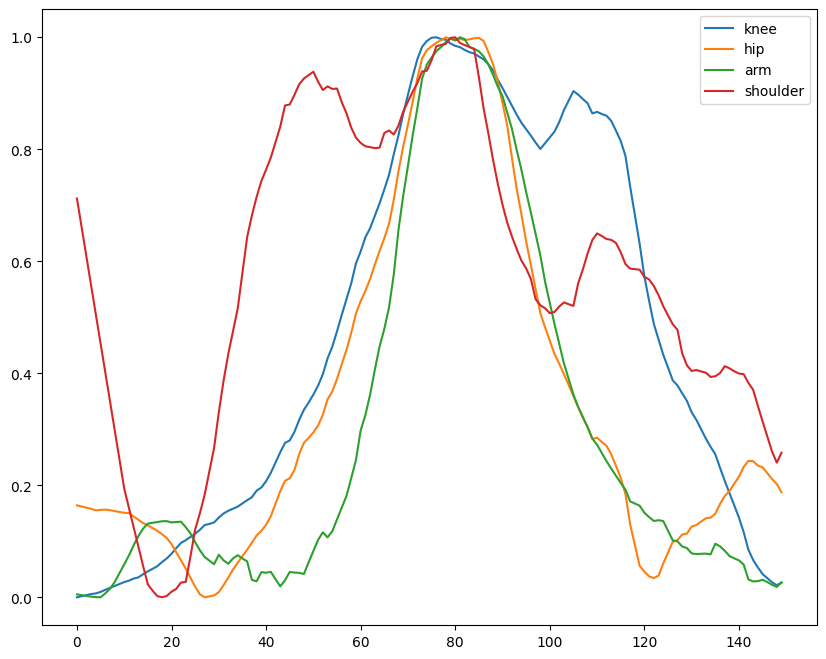

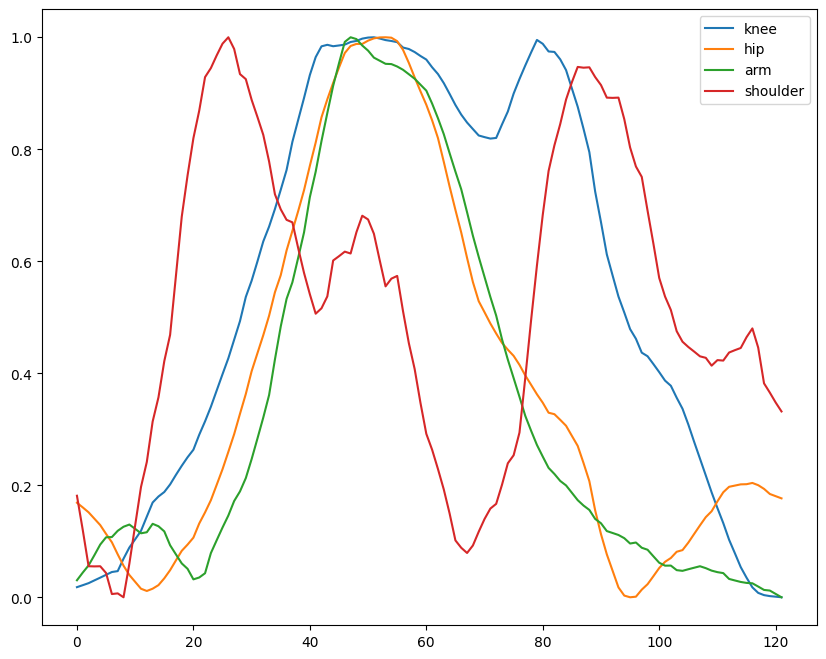

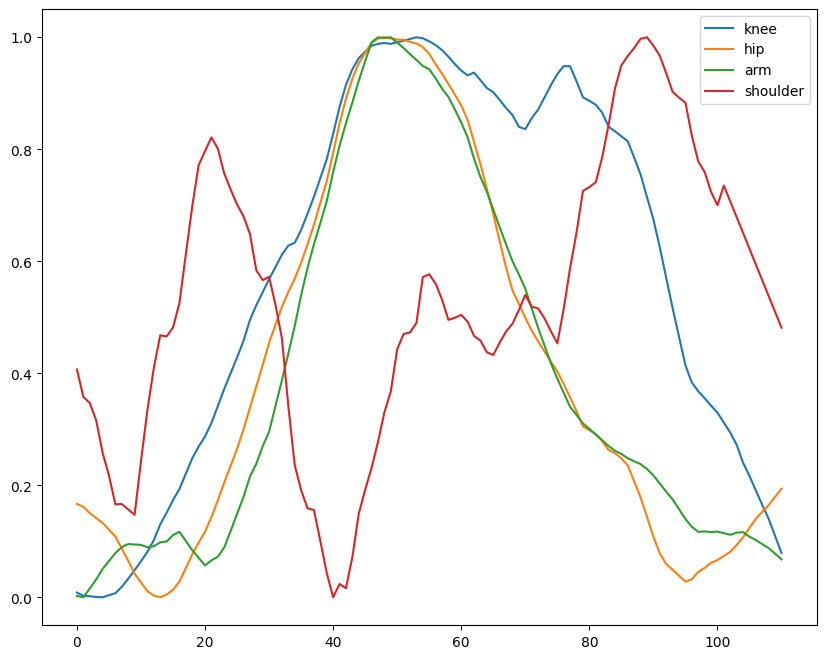

In [28]:
#divide in single strokes
from scipy.signal import find_peaks
import numpy as np

##find local minima and maxima, use only minima
min_peaks = extract_stroke_sequences_gradient(smoothed_angles_knee)

##divide into single strokes
strokes = []

#print(min_peaks)
for i in range(len(min_peaks)-1):
  smoothed_angles_knee_slice = smoothed_angles_knee[min_peaks[i]:min_peaks[i+1]]
  smoothed_angles_hip_slice = smoothed_angles_hip[min_peaks[i]:min_peaks[i+1]]
  smoothed_angles_arm_slice = 180-smoothed_angles_arm[min_peaks[i]:min_peaks[i+1]] #invert arm agle for better visulisation
  smoothed_angles_shoulder_slice = smoothed_angles_shoulder[min_peaks[i]:min_peaks[i+1]]
  strokes.append([smoothed_angles_knee_slice, smoothed_angles_hip_slice, smoothed_angles_arm_slice, smoothed_angles_shoulder_slice])
print(len(strokes))


#plot_single_stroke(strokes[2], ["knee", "hip", "arm"], normalize=True)
for stroke in strokes:
  plot_single_stroke(stroke, ["knee", "hip", "arm","shoulder"], normalize=True)